In [1]:
import os
import time
import pandas as pd
import numpy as np

import data
import plot
import fit_aorta

from models.liver_cal_hf2cm_var2k import TwoShotTwoScan as Liver


Read data

In [2]:
filepath = os.path.abspath("")
datapath = os.path.join(filepath, 'devdata')
resultspath = os.path.join(filepath, 'devresults')
output_file = os.path.join(resultspath, 'parameters.csv')
resultsfolder = os.path.dirname(output_file)
s = os.listdir(datapath)[0]
subj = os.path.join(datapath, s)
subj_data = data.twoshot_twoscan(subj)
(   time1, fa1, aorta1, liver1, portal1,
    aorta_valid1, liver_valid1, portal_valid1,
    time2, fa2, aorta2, liver2, portal2,
    aorta_valid2, liver_valid2, portal_valid2,
    T1time1, T1aorta1, T1liver1, T1portal1,
    T1time2, T1aorta2, T1liver2, T1portal2,
    T1time3, T1aorta3, T1liver3, T1portal3, 
    weight, dose1, dose2) = subj_data

Read fitted aorta

In [3]:
visit = 'baseline'
aortaresults = os.path.join(filepath, 'results_aorta') 
aortapars = os.path.join(aortaresults, s[:3] + '_' + visit + '.csv')
aorta = fit_aorta.read(subj_data, aortapars)

Reading aorta...


Fit liver


In [4]:
# Fit liver
liver = Liver(aorta)
# Set data
xvalid = np.concatenate([liver_valid1, liver_valid2, np.full(3, True)])
liver.set_x(time1, time2, [T1time1,T1time2,T1time3], valid=xvalid)
liver.set_y(liver1, liver2, [1000.0/T1liver1, 1000.0/T1liver2, 1000.0/T1liver3])
# Set fit options

liver.ptol = 1e-6

In [5]:
liver.reset_p()
liver.estimate_p()

Goodness of fit (%):  3.1499134669783584


Goodness of fit (%):  3.1498975273721634


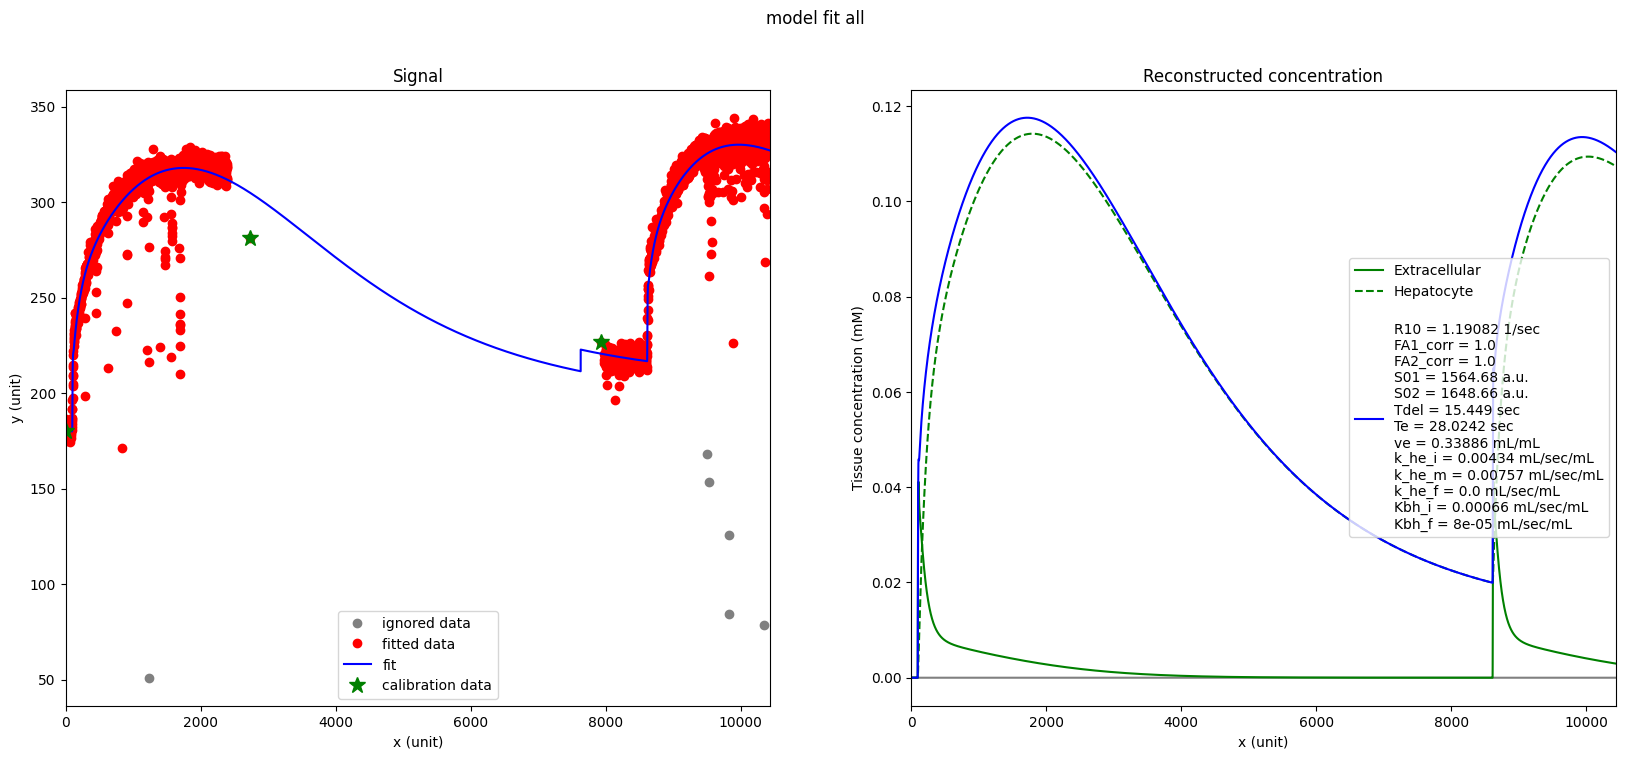

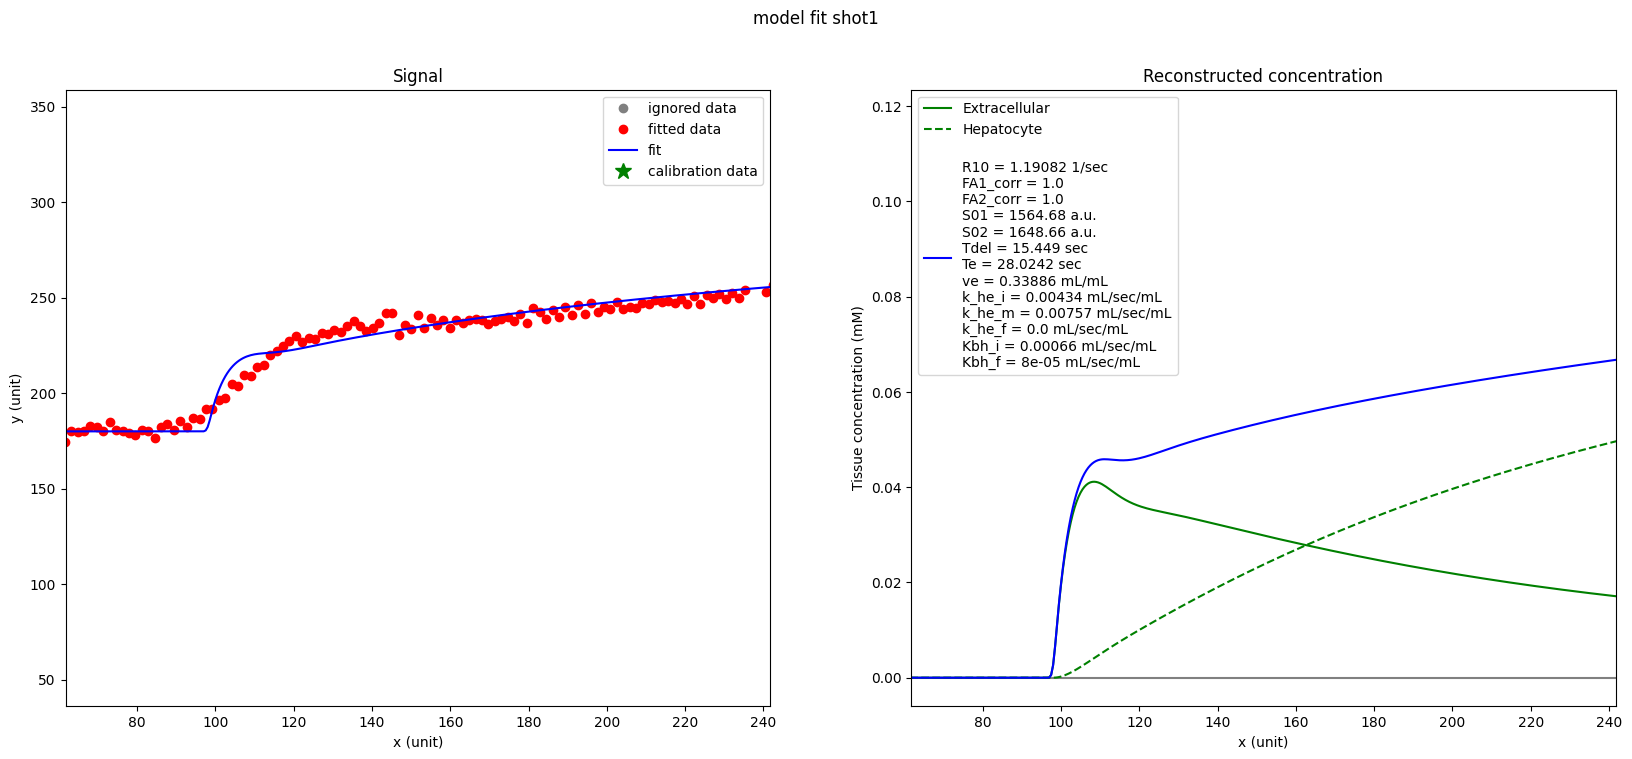

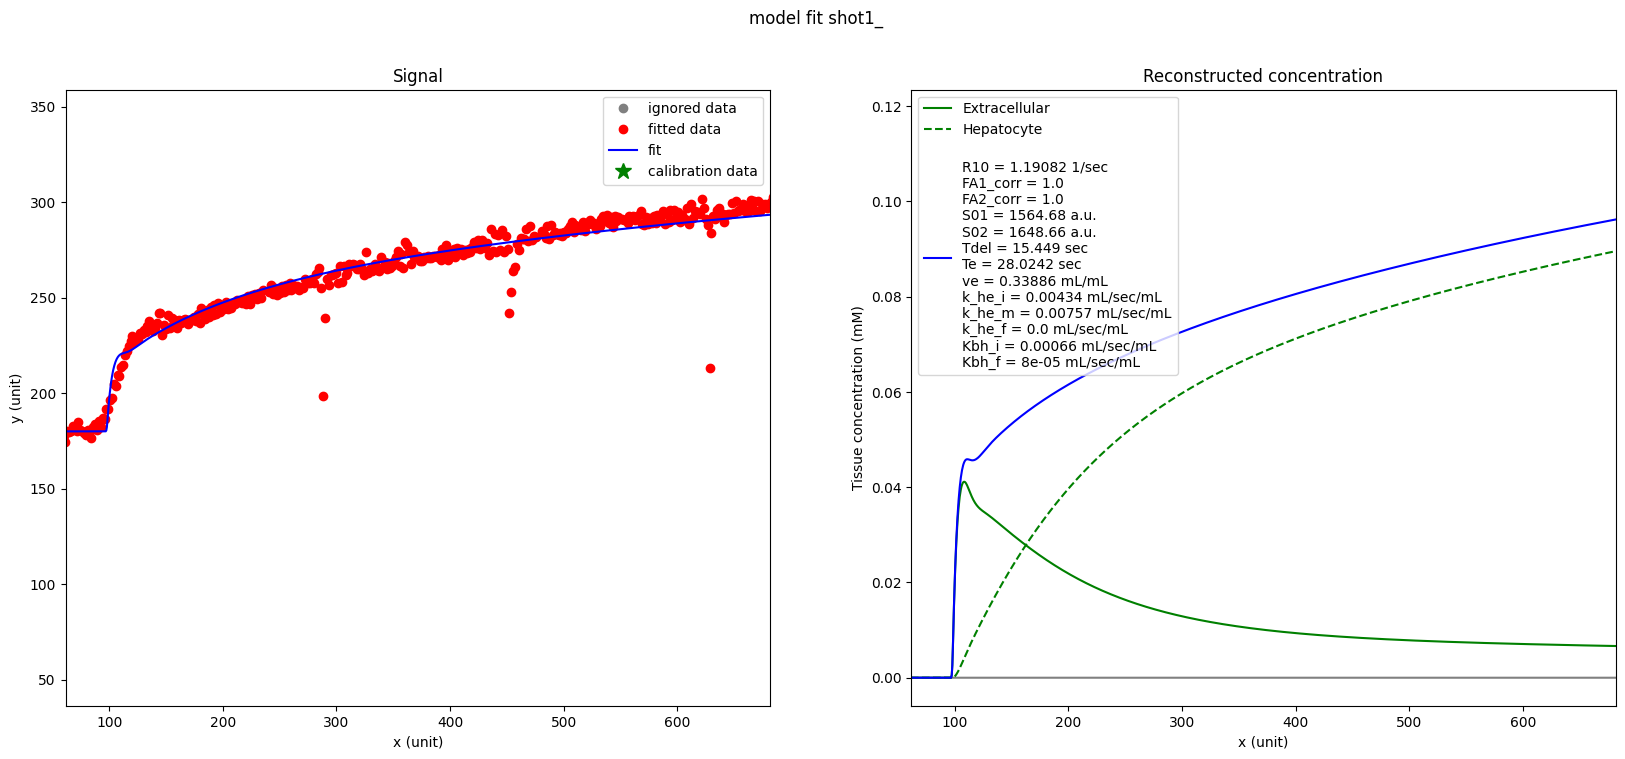

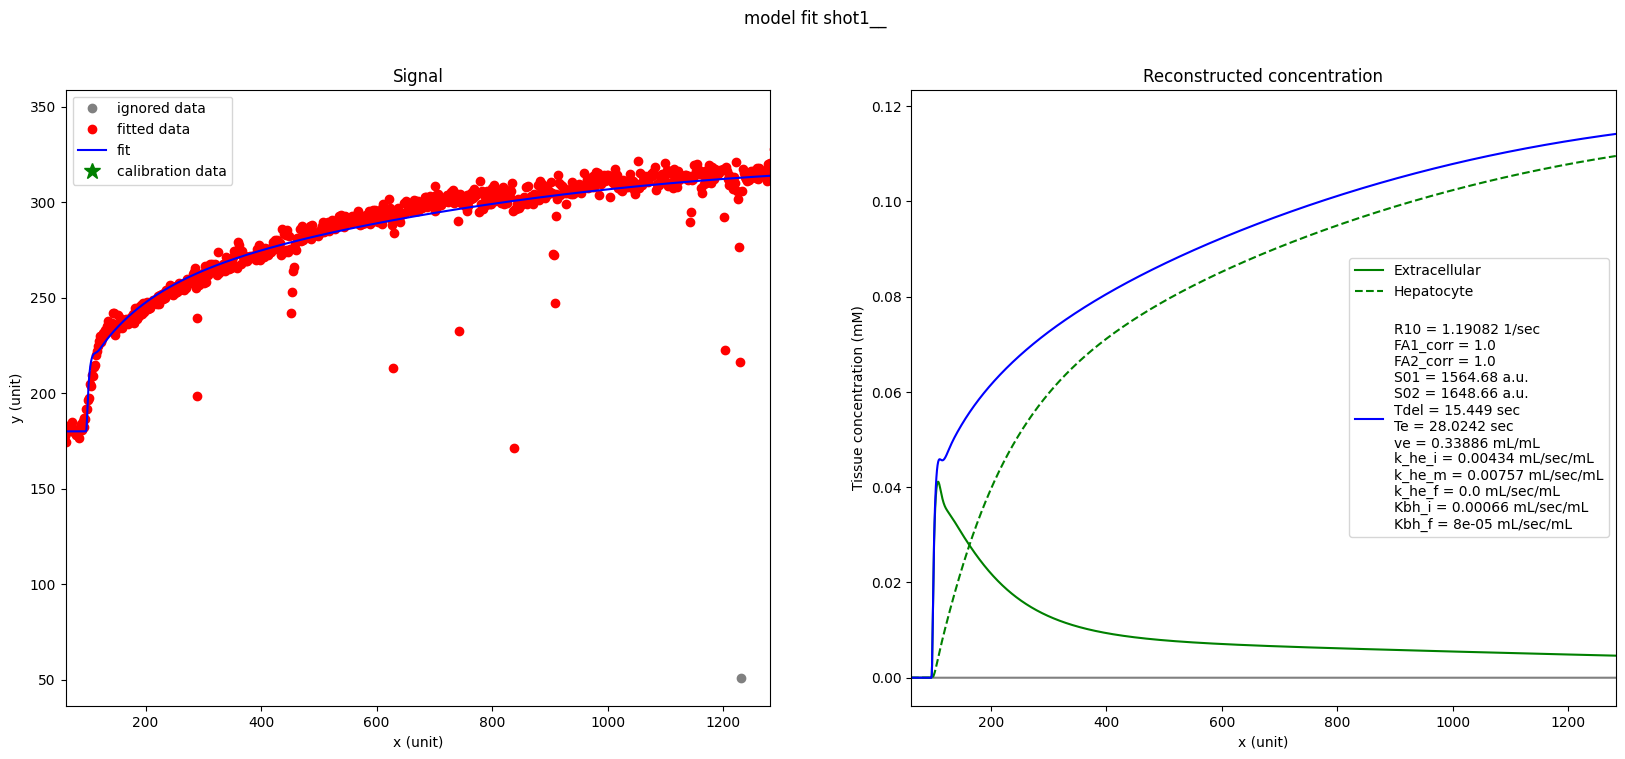

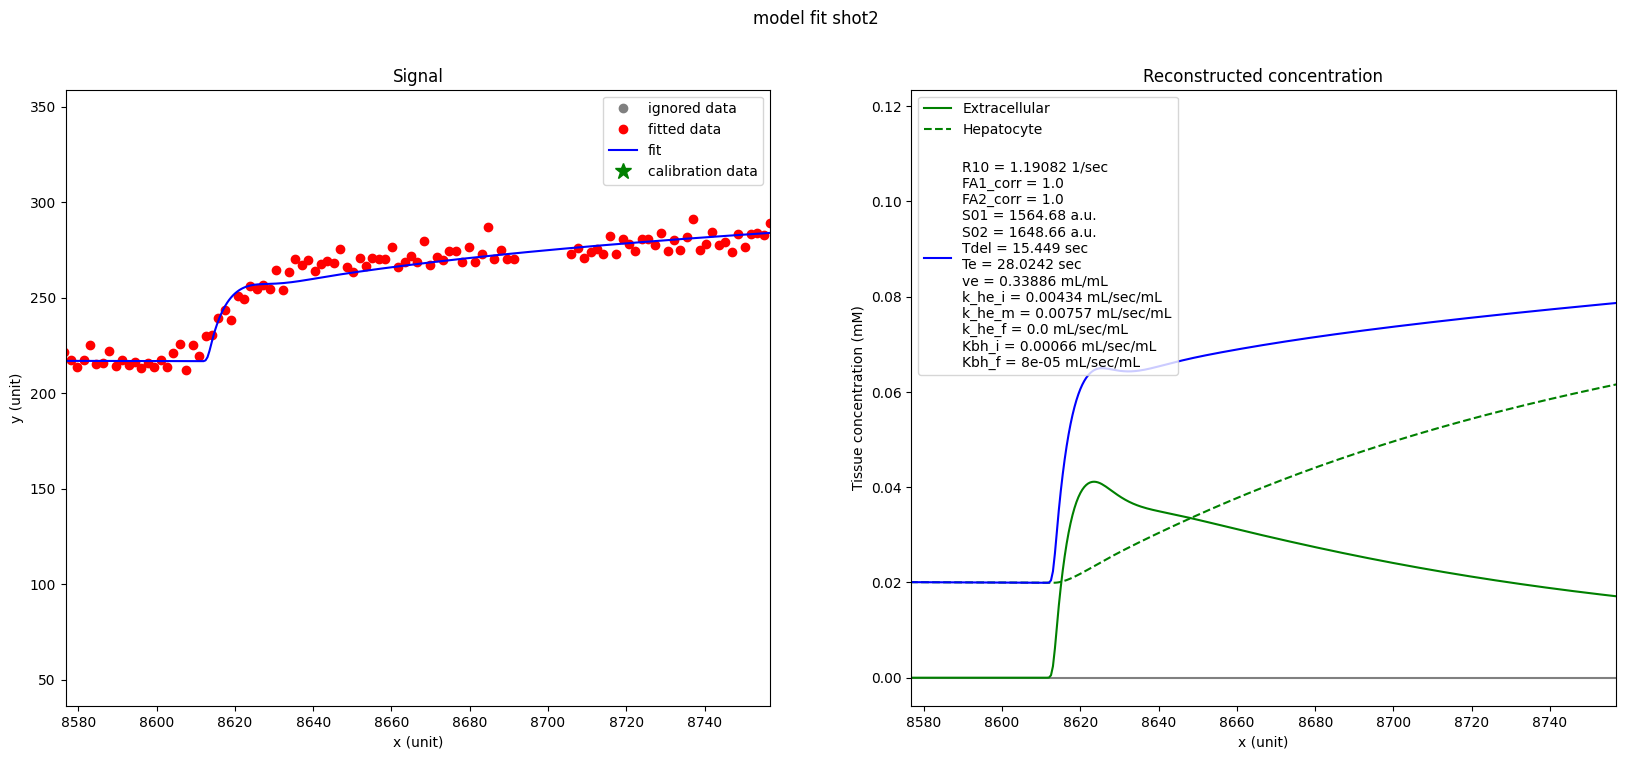

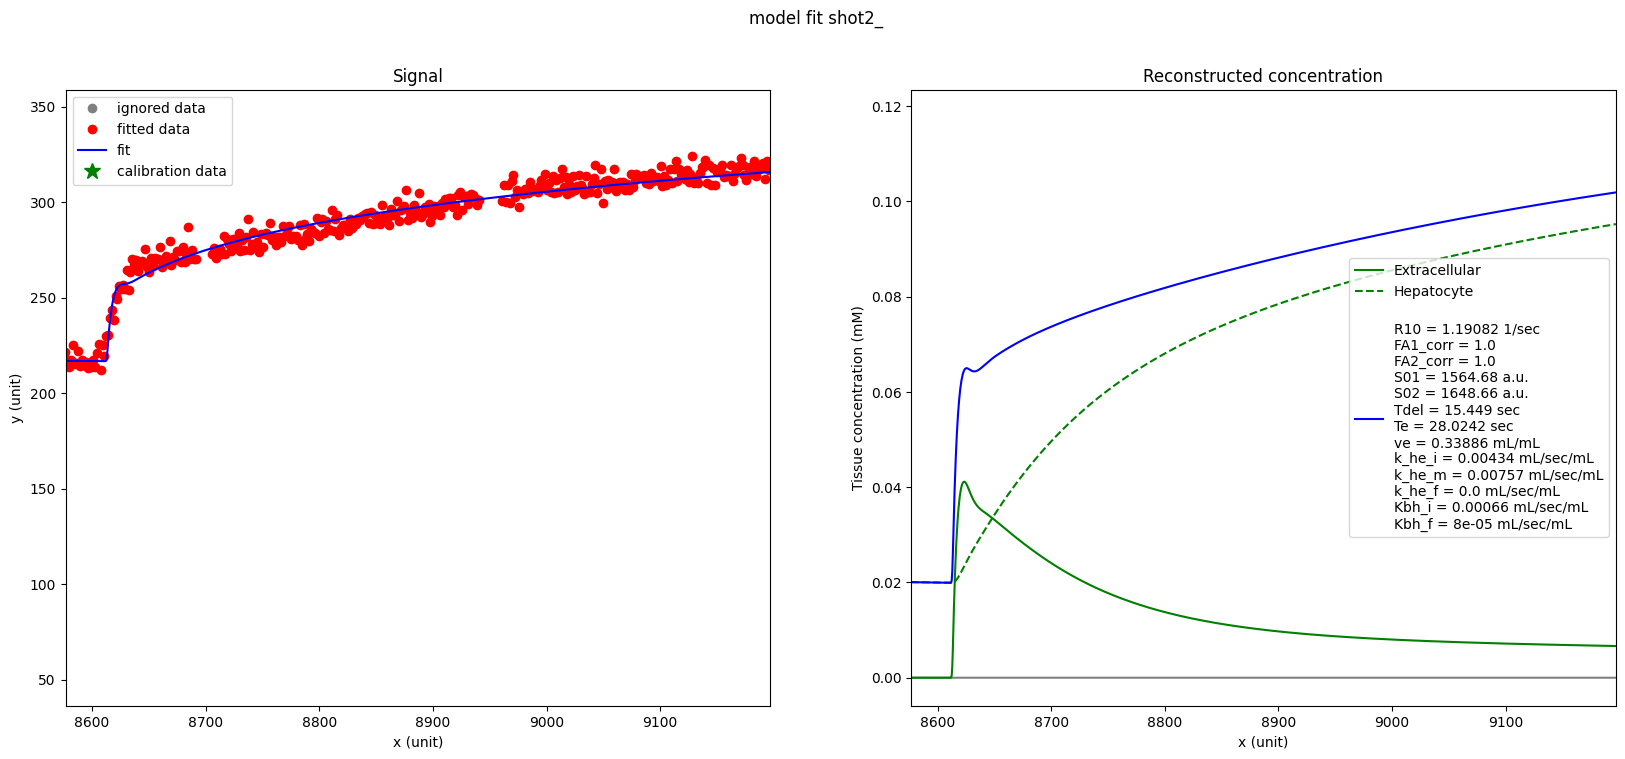

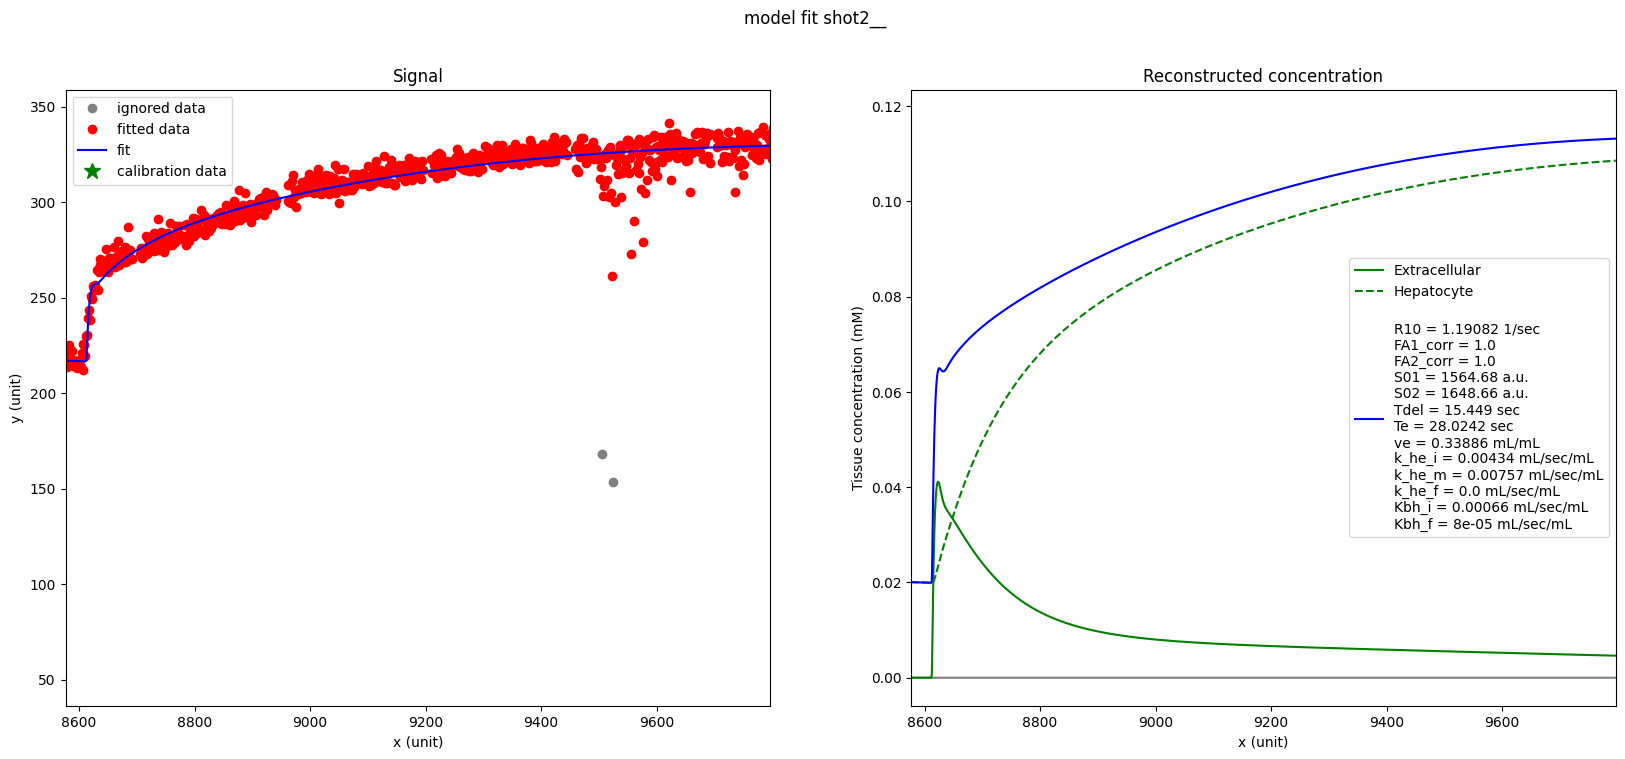

                                            name         value          unit
symbol                                                                      
R10                         Precontrast liver R1  1.190816e+00         1/sec
FA1_corr                    FA correction factor  1.000000e+00              
FA2_corr                    FA correction factor  1.000000e+00              
S01                          Signal amplitude S0  1.564680e+03          a.u.
S02                          Signal amplitude S0  1.648659e+03          a.u.
Tdel                              Gut delay time  1.544903e+01           sec
Te                    Extracellular transit time  4.670702e-01           min
ve                 Extracellular volume fraction  3.388646e+01      mL/100mL
k_he_i                Hepatocellular uptake rate  2.602368e+01  mL/min/100mL
k_he_m                Hepatocellular uptake rate  2.602368e+01  mL/min/100mL
k_he_f                Hepatocellular uptake rate  1.852889e-27  mL/min/100mL

In [7]:
#liver.set_xrange(0, aorta.p.value.BAT1+40)
#liver.set_xrange(0, aorta.t[-1])

liver.set_cweight(1e-3)

# Fit or not
liver.p.at['S01', 'fit'] = True
liver.p.at['S02', 'fit'] = True
liver.p.at['FA1_corr', 'fit'] = False
liver.p.at['FA2_corr', 'fit'] = False

print('Goodness of fit (%): ', liver.goodness())
liver.fit_p()
print('Goodness of fit (%): ', liver.goodness())
liver.plot_fit()
print(liver.export_p())